# Name: Ayush Dattatray Bhagat.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from urllib.parse import urljoin

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
links = soup.find_all('link', href=True)

for link in links:
    print(link['href'])

/appassets/fonts/lato-regular.woff2
/appassets/fonts/lato-700.woff2
/appassets/fonts/lato-900.woff2
/appassets/fonts/anton.woff
/appassets/favicon.ico
https://images.justwatch.com
https://www.googletagmanager.com/
https://ib.adnxs.com
https://www.justwatch.com/in/movies
https://www.justwatch.com/ad/pellicules
https://www.justwatch.com/ae/movies
https://www.justwatch.com/ag/movies
https://www.justwatch.com/al/filmat
https://www.justwatch.com/ao/filmes
https://www.justwatch.com/ar/peliculas
https://www.justwatch.com/at/Filme
https://www.justwatch.com/au/movies
https://www.justwatch.com/az/filmlər
https://www.justwatch.com/ba/filmovi
https://www.justwatch.com/bb/movies
https://www.justwatch.com/be/films
https://www.justwatch.com/bf/films
https://www.justwatch.com/bg/филми
https://www.justwatch.com/bh/movies
https://www.justwatch.com/bm/movies
https://www.justwatch.com/bo/peliculas
https://www.justwatch.com/br/filmes
https://www.justwatch.com/bs/movies
https://www.justwatch.com/by/фільмы
h

In [ ]:
base_url = 'https://www.justwatch.com'
movie_links = soup.find_all('a', class_='title-list-grid__item--link')
movie_urls_list = [urljoin(base_url, link['href']) for link in movie_links]

In [ ]:
movie_urls = []
movie_names = []

In [ ]:
for movie_url in movie_urls_list:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
        movie_names.append(movie_name)
        movie_urls.append(movie_url)
    else:
        movie_names.append("Movie name not found")
        movie_urls.append("URL not found")


if len(movie_urls) == len(movie_names):

    data = {
        'Movie Name': movie_names,
        'Movie URL': movie_urls
    }


    movies_dataframe = pd.DataFrame(data)


    print(movies_dataframe)
else:
    print("Error: Lengths of Movie URLs List and Movie Names List do not match.")


                                  Movie Name  \
0                           Hanu-Man  (2024)   
1                        Oppenheimer  (2023)   
2   Teri Baaton Mein Aisa Uljha Jiya  (2024)   
3                            Fighter  (2024)   
4                        Poor Things  (2023)   
..                                       ...   
95                      Movie name not found   
96                      Movie name not found   
97                      Movie name not found   
98                      Movie name not found   
99                            Fast X  (2023)   

                                            Movie URL  
0         https://www.justwatch.com/in/movie/hanu-man  
1      https://www.justwatch.com/in/movie/oppenheimer  
2   https://www.justwatch.com/in/movie/untitled-sh...  
3     https://www.justwatch.com/in/movie/fighter-2022  
4      https://www.justwatch.com/in/movie/poor-things  
..                                                ...  
95                             

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
soup = BeautifulSoup(page.text, 'html.parser')

# List to store movie titles
movie_titles = []

# All anchors with class 'title-list-grid__item--link'
movie_anchors = soup.find_all('a', class_='title-list-grid__item--link')

# Extract movie titles from the 'img' tag within each anchor
for movie_anchor in movie_anchors:
    img_tag = movie_anchor.find('img')
    if img_tag:
        movie_title = img_tag['alt']
        movie_titles.append(movie_title)
    else:
        movie_titles.append("Title not found")

# Create a DataFrame with movie titles
titles_dataframe = pd.DataFrame({'Title': movie_titles})

# Display the DataFrame
titles_dataframe

,Title
0,Hanu-Man
1,Oppenheimer
2,Teri Baaton Mein Aisa Uljha Jiya
3,Fighter
4,Poor Things
...,...
95,Pushpa: The Rise - Part 1
96,Rocky Aur Rani Kii Prem Kahaani
97,Joshua: Imai Pol Kaka
98,Land of Bad


In [ ]:
movies = soup.find_all('div', class_='title-list-grid__item')

for movie in movies:
        try:
          movie_title = movie.find('img')['alt']
        except TypeError:
          movie_title = "Image not found"

        print(f"Movie Title: {movie_title}")

Movie Title: Hanu-Man
Movie Title: Oppenheimer
Movie Title: Teri Baaton Mein Aisa Uljha Jiya
Movie Title: Fighter
Movie Title: Poor Things
Movie Title: Anatomy of a Fall
Movie Title: Bramayugam
Movie Title: Dune
Movie Title: Animal
Movie Title: Merry Christmas
Movie Title: 12th Fail
Movie Title: Road House
Movie Title: Manjummel Boys
Movie Title: Anyone But You
Movie Title: Murder Mubarak
Movie Title: Anweshippin Kandethum
Movie Title: Shaitaan
Movie Title: Aattam
Movie Title: Premalu
Movie Title: Article 370
Movie Title: Sam Bahadur
Movie Title: Kung Fu Panda
Movie Title: Dune: Part Two
Movie Title: Salaar
Movie Title: Eagle
Movie Title: The Beekeeper
Movie Title: Crew
Movie Title: Laapataa Ladies
Movie Title: Damsel
Movie Title: Godzilla x Kong: The New Empire
Movie Title: Madame Web
Movie Title: Godzilla Minus One
Movie Title: The Kerala Story
Movie Title: Abraham Ozler
Movie Title: 365 Days
Movie Title: Aquaman and the Lost Kingdom
Movie Title: Dunki
Movie Title: The Holdovers
Movi

In [ ]:
for year in movies:
     # Extracting the movie title from the alt attribute of img tag
     try:
        movie_year = year.find('img')['alt']
     except TypeError:
        movie_year = ""

        print(movie_year)

In [ ]:
movies = soup.find_all('div', class_='title-list-grid__item')

for movie in movies:

        try:
          movie_title = movie.find('img')['alt']
        except TypeError:
          movie_title = "Image not found"

        base_url = "https://www.justwatch.com"
        movie_url = base_url + movie.find('a')['href']

        try:
          movie_poster_url = movie.find('img')['src']
        except TypeError:
          movie_title = "Image not found"

        release_year = None
        if '(' in movie_title and ')' in movie_title:
            release_year = movie_title.split('(')[-1].split(')')[0]


        print(f"Movie Title: {movie_title}")
        print(f"Release Year: {release_year}")
        print(f"Movie URL: {movie_url}")
        print(f"Movie Poster URL: {movie_poster_url}")
        print("---")
else:
    print("Failed to retrieve the webpage")

Movie Title: Hanu-Man
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/hanu-man
Movie Poster URL: https://www.justwatch.com/images/poster/306322126/s166/hanu-man
---
Movie Title: Oppenheimer
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/oppenheimer
Movie Poster URL: https://www.justwatch.com/images/poster/305252655/s166/oppenheimer
---
Movie Title: Teri Baaton Mein Aisa Uljha Jiya
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film
Movie Poster URL: https://www.justwatch.com/images/poster/313121131/s166/untitled-shahid-kapoor-kriti-sanon-film
---
Movie Title: Fighter
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/fighter-2022
Movie Poster URL: https://www.justwatch.com/images/poster/311196446/s166/fighter-2022
---
Movie Title: Poor Things
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/poor-things
Movie Poster URL: data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEA

## **Scrapping release Year**

In [ ]:
# Write Your Code here
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
release_years_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_movie.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
    else:
        release_year = "Release year not found"

    # Append data to lists
    movie_names.append(movie_name)
    release_years_list.append(release_year)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Release Year': release_years_list
})

# Display the DataFrame
movies_dataframe

,Movie Name,Release Year
0,Hanu-Man (2024),2024
1,Oppenheimer (2023),2023
2,Teri Baaton Mein Aisa Uljha Jiya (2024),2024
3,Fighter (2024),2024
4,Poor Things (2023),2023
...,...,...
95,Movie name not found,Release year not found
96,Movie name not found,Release year not found
97,Joshua: Imai Pol Kaka (2024),2024
98,Movie name not found,Release year not found


## **Scrapping Genres**

In [ ]:
for movie in movies:
    try:
        movie_title = movie.find('img')['alt']
    except TypeError:
      movie_title = 'Title not found'

    base_url = "https://www.justwatch.com"
    movie_url = base_url + movie.find('a')['href']
    try:
        movie_poster_url = movie.find('img')['src']
    except TypeError:
        movie_poster_url = ""

print(f"Movie Title: {movie_title}")
print(f"Release Year: {release_year}")
print(f"Movie URL: {movie_url}")
print(f"Movie Poster URL: {movie_poster_url}")
print("---")

Movie Title: Fast X
Release Year: Release year not found
Movie URL: https://www.justwatch.com/in/movie/fast-x
Movie Poster URL: data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
---


In [ ]:
# Write Your Code here
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
genres_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Genres" label
    genres_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            genres = genres_div.text.strip()
        else:
            genres = "Genres not found"
    else:
        genres = "Genres not found"

    # Append data to lists
    movie_names.append(movie_name)
    genres_list.append(genres)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Genres': genres_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Genres
0,Hanu-Man (2024),"Fantasy, Action & Adventure, Comedy, Science-F..."
1,Oppenheimer (2023),"History, Drama"
2,Teri Baaton Mein Aisa Uljha Jiya (2024),"Comedy, Drama, Romance, Science-Fiction"
3,Fighter (2024),"War & Military, Action & Adventure, Mystery & ..."
4,Poor Things (2023),"Science-Fiction, Romance, Comedy, Drama"
...,...,...
95,Movie name not found,Genres not found
96,Movie name not found,Genres not found
97,Joshua: Imai Pol Kaka (2024),"Action & Adventure, Mystery & Thriller, Crime"
98,Movie name not found,Genres not found


## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
movie_names = []
imdb_ratings_list = []
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified div and class
    title_block = soup_movie.find('div', class_='title-block')
    if title_block:
        movie_name = title_block.find('h1').text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_movie.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    movie_names.append(movie_name)
    imdb_ratings_list.append(imdb_rating)

# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'IMDb Rating': imdb_ratings_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe

,Movie Name,IMDb Rating
0,Hanu-Man (2024),8.0
1,Oppenheimer (2023),8.3
2,Teri Baaton Mein Aisa Uljha Jiya (2024),6.6
3,Fighter (2024),6.4
4,Poor Things (2023),8.0
...,...,...
95,Movie name not found,None
96,Movie name not found,None
97,Movie name not found,None
98,Movie name not found,None


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
movie_names = []
runtimes_list = []
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Runtime" label
    runtime_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    movie_names.append(movie_name)
    runtimes_list.append(runtime)

# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'Runtime': runtimes_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe

,Movie Name,Runtime
0,Hanu-Man (2024),2h
1,Oppenheimer (2023),3h
2,Teri Baaton Mein Aisa Uljha Jiya (2024),2h
3,Movie name not found,Runtime information not found
4,Movie name not found,Runtime information not found
...,...,...
95,Movie name not found,Runtime information not found
96,Movie name not found,Runtime information not found
97,Movie name not found,Runtime information not found
98,Movie name not found,Runtime information not found


## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
age_ratings_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Age rating" label
    age_rating_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    movie_names.append(movie_name)
    age_ratings_list.append(age_rating)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Age Rating': age_ratings_list
})

# Display the DataFrame
movies_dataframe

,Movie Name,Age Rating
0,Hanu-Man (2024),UA
1,Oppenheimer (2023),UA
2,Teri Baaton Mein Aisa Uljha Jiya (2024),Age rating not found
3,Fighter (2024),UA
4,Poor Things (2023),A
...,...,...
95,Movie name not found,Age rating not found
96,Movie name not found,Age rating not found
97,Movie name not found,Age rating not found
98,Movie name not found,Age rating not found


## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
movie_names = []
streaming_availability = []

# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Extract movie URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
movie_urls = [urljoin(base_url, link['href']) for link in movie_links]

# Iterate through each movie URL and scrape streaming availability
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    movie_name = h1_tag.text.strip() if h1_tag else "Movie name not found"
    movie_names.append(movie_name)

    # Find the streaming availability information
    streaming_section = soup_movie.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability.append(platform)
        else:
            streaming_availability.append("Streaming not available")
    else:
        streaming_availability.append("Streaming information not found")

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Streaming Availability': streaming_availability
})

# Display the DataFrame
movies_dataframe

,Movie Name,Streaming Availability
0,Hanu-Man (2024),Streaming information not found
1,Oppenheimer (2023),Streaming information not found
2,Movie name not found,Streaming information not found
3,Movie name not found,Streaming information not found
4,Movie name not found,Streaming information not found
...,...,...
95,Movie name not found,Streaming information not found
96,Rocky Aur Rani Kii Prem Kahaani (2023),Streaming information not found
97,Movie name not found,Streaming information not found
98,Movie name not found,Streaming information not found


## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
data = {
    'movie_titles': movie_titles,
    'movie_urls': movie_urls_list,
    'movies_release_years': release_years_list,
    'movies_genres': genres_list,
    'movies_runtimes': runtimes_list,
    'movies_age_ratings': age_ratings_list,
    'movies_imdb_ratings': imdb_ratings_list,
    'movies_streaming_availability': streaming_availability,

}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

In [ ]:
movies_dataframe.head(20)

,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
0,Hanu-Man,https://www.justwatch.com/in/movie/hanu-man,2024,"Fantasy, Action & Adventure, Comedy, Science-F...",2h,UA,8.0,Streaming information not found
1,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,"History, Drama",3h,UA,8.3,Streaming information not found
2,Teri Baaton Mein Aisa Uljha Jiya,https://www.justwatch.com/in/movie/untitled-sh...,2024,"Comedy, Drama, Romance, Science-Fiction",2h,Age rating not found,6.6,Streaming information not found
3,Fighter,https://www.justwatch.com/in/movie/fighter-2022,2024,"War & Military, Action & Adventure, Mystery & ...",Runtime information not found,UA,6.4,Streaming information not found
4,Poor Things,https://www.justwatch.com/in/movie/poor-things,2023,"Science-Fiction, Romance, Comedy, Drama",Runtime information not found,A,8.0,Streaming information not found
5,Anatomy of a Fall,https://www.justwatch.com/in/movie/anatomie-du...,2023,"Mystery & Thriller, Crime, Drama",Runtime information not found,Age rating not found,7.7,Streaming information not found
6,Bramayugam,https://www.justwatch.com/in/movie/bramayugam,2024,"Horror, Mystery & Thriller",2h,Age rating not found,None,Streaming information not found
7,Dune,https://www.justwatch.com/in/movie/dune-2021,2021,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found
8,Animal,https://www.justwatch.com/in/movie/animal-2022,2023,Genres not found,Runtime information not found,Age rating not found,None,Streaming information not found
9,Merry Christmas,https://www.justwatch.com/in/movie/merry-chris...,Release year not found,"Mystery & Thriller, Drama",Runtime information not found,Age rating not found,7.0,Streaming information not found


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
tv_show_urls = []
tv_show_names = []

# Extract TV show URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
tv_show_links = soup.find_all('a', class_='title-list-grid__item--link')
tv_show_urls_list = [urljoin(base_url, link['href']) for link in tv_show_links]

# Create a list of TV show names and URLs
for tv_show_url in tv_show_urls_list:
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show name within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_name = h1_tag.text.strip()
        tv_show_names.append(tv_show_name)
        tv_show_urls.append(tv_show_url)
    else:
        tv_show_names.append("TV show name not found")
        tv_show_urls.append("URL not found")

# Ensure that the lengths match before creating the DataFrame
if len(tv_show_urls) == len(tv_show_names):
    # Create a DataFrame from the lists
    data = {
        'TV Show Name': tv_show_names,
        'TV Show URL': tv_show_urls
    }

    # Create a DataFrame from the dictionary
    tv_shows_dataframe = pd.DataFrame(data)

    # Display the DataFrame
    print(tv_shows_dataframe)
else:
    print("Error: Lengths of TV Show URLs List and TV Show Names List do not match.")

                TV Show Name  \
0             Shōgun  (2024)   
1           Mirzapur  (2018)   
2     3 Body Problem  (2024)   
3          Panchayat  (2020)   
4    Game of Thrones  (2011)   
..                       ...   
95    TV show name not found   
96    TV show name not found   
97    TV show name not found   
98    TV show name not found   
99  Better Call Saul  (2015)   

                                          TV Show URL  
0    https://www.justwatch.com/in/tv-show/shogun-2024  
1       https://www.justwatch.com/in/tv-show/mirzapur  
2   https://www.justwatch.com/in/tv-show/3-body-pr...  
3      https://www.justwatch.com/in/tv-show/panchayat  
4   https://www.justwatch.com/in/tv-show/game-of-t...  
..                                                ...  
95                                      URL not found  
96                                      URL not found  
97                                      URL not found  
98                                      URL not found  

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# List to store TV show titles
tv_show_titles = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Extract TV show titles from the href attribute
for tv_show_link in tv_show_links:
    href = tv_show_link.get('href')
    if href:
        tv_show_name = href.split('/')[-1]  # Extract the last segment as the TV show name
        tv_show_titles.append(tv_show_name)
    else:
        tv_show_titles.append("Title not found")

# Create a DataFrame with TV show titles
tv_shows_dataframe = pd.DataFrame({'TV Show Title': tv_show_titles})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title
0,shogun-2024
1,mirzapur
2,3-body-problem
3,panchayat
4,game-of-thrones
...,...
95,candy-2021
96,the-indrani-mukerjea-story-buried-truth
97,wednesday
98,dexter


## **Fetching Release Year**

In [ ]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
release_years_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
        tv_show_titles.append(tv_show_title)
    else:
        tv_show_titles.append("TV show title not found")

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_tv_show.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
        release_years_list2.append(release_year)
    else:
        release_years_list2.append("Release year not found")

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Release Year': release_years_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Release Year
0,Shōgun (2024),2024
1,Mirzapur (2018),2018
2,3 Body Problem (2024),2024
3,Panchayat (2020),2020
4,Game of Thrones (2011),2011
...,...,...
95,Candy (2021),2021
96,TV show title not found,Release year not found
97,TV show title not found,Release year not found
98,TV show title not found,Release year not found


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
genres_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Genres" label
    genres_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            tv_show_genres = genres_div.text.strip()
        else:
            tv_show_genres = "Genres not found"
    else:
        tv_show_genres = "Genres not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    genres_list2.append(tv_show_genres)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Genres': genres_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Genres
0,Shōgun (2024),"War & Military, Drama, History"
1,Mirzapur (2018),"Crime, Action & Adventure, Drama, Mystery & Th..."
2,3 Body Problem (2024),"Mystery & Thriller, Drama, Science-Fiction, Fa..."
3,TV show title not found,Genres not found
4,TV show title not found,Genres not found
...,...,...
95,TV show title not found,Genres not found
96,TV show title not found,Genres not found
97,Wednesday (2022),"Science-Fiction, Mystery & Thriller, Comedy, C..."
98,TV show title not found,Genres not found


## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
imdb_ratings_list2 = []

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_tv_show.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    imdb_ratings_list2.append(imdb_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'IMDb Rating': imdb_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,IMDb Rating
0,Shōgun (2024),9.1
1,Mirzapur (2018),8.5
2,TV show title not found,None
3,TV show title not found,None
4,TV show title not found,None
...,...,...
95,TV show title not found,None
96,TV show title not found,None
97,TV show title not found,None
98,TV show title not found,None


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
age_ratings_list2 = []

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Age rating" label
    age_rating_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    age_ratings_list2.append(age_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Age Rating': age_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Age Rating
0,Shōgun (2024),Age rating not found
1,Mirzapur (2018),Age rating not found
2,3 Body Problem (2024),A
3,TV show title not found,Age rating not found
4,TV show title not found,Age rating not found
...,...,...
95,TV show title not found,Age rating not found
96,TV show title not found,Age rating not found
97,TV show title not found,Age rating not found
98,TV show title not found,Age rating not found


## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
streaming_availability_list2 = []

# Iterate through each TV show URL and scrape streaming availability
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the streaming availability information
    streaming_section = soup_tv_show.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability_list2.append(platform)
        else:
            streaming_availability_list2.append("Streaming not available")
    else:
        streaming_availability_list2.append("Streaming information not found")

# Create a DataFrame from the lists
tv_shows_dataframe= pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Streaming Availability': streaming_availability_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Streaming Availability
0,Shōgun (2024),Streaming information not found
1,Mirzapur (2018),Streaming information not found
2,3 Body Problem (2024),Streaming information not found
3,TV show title not found,Streaming information not found
4,TV show title not found,Streaming information not found
...,...,...
95,TV show title not found,Streaming information not found
96,The Indrani Mukerjea Story: Buried Truth (2024),Streaming information not found
97,TV show title not found,Streaming information not found
98,TV show title not found,Streaming information not found


## **Fetching Duration Details**

In [ ]:
# Write Your Code here
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
runtimes_list2 = []

# Iterate through each TV show URL and scrape runtime
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the "Runtime" label
    runtime_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    runtimes_list2.append(runtime)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Runtime': runtimes_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Runtime
0,Shōgun (2024),58min
1,Mirzapur (2018),50min
2,3 Body Problem (2024),56min
3,TV show title not found,Runtime information not found
4,TV show title not found,Runtime information not found
...,...,...
95,TV show title not found,Runtime information not found
96,TV show title not found,Runtime information not found
97,TV show title not found,Runtime information not found
98,TV show title not found,Runtime information not found


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tv_shows_data = {
    'tv_show_titles': tv_show_titles,
    'tv_show_urls': tv_show_urls,
    'tv_shows_runtimes': runtimes_list2,
    'tv_shows_age_ratings': age_ratings_list2,
    'tv_shows_imdb_ratings': imdb_ratings_list2,
    'tv_shows_genres': genres_list2,
    'tv_shows_release_years': release_years_list2,
    'tv_shows_streaming_availability': streaming_availability_list2,
}

# Create a DataFrame from the dictionary
tv_shows_dataframe = pd.DataFrame(tv_shows_data)

# Display the DataFrame
tv_shows_dataframe.head(5)

,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
0,Shōgun (2024),https://www.justwatch.com/in/tv-show/shogun-2024,58min,Age rating not found,9.1,"War & Military, Drama, History",2024,Streaming information not found
1,Mirzapur (2018),https://www.justwatch.com/in/tv-show/mirzapur,50min,Age rating not found,8.5,"Crime, Action & Adventure, Drama, Mystery & Th...",2018,Streaming information not found
2,3 Body Problem (2024),https://www.justwatch.com/in/tv-show/3-body-pr...,56min,A,None,"Mystery & Thriller, Drama, Science-Fiction, Fa...",2024,Streaming information not found
3,TV show title not found,https://www.justwatch.com/in/tv-show/panchayat,Runtime information not found,Age rating not found,None,Genres not found,2020,Streaming information not found
4,TV show title not found,https://www.justwatch.com/in/tv-show/game-of-t...,Runtime information not found,Age rating not found,None,Genres not found,2011,Streaming information not found


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
from datetime import datetime

# Get the current date
current_date = datetime.now()

# Extract the year from the current date
current_year = current_date.year

print("Current Date:", current_date)
print("Current Year:", current_year)

#function to filter only the movies and tv shows released in last 2 years from current date

from datetime import datetime
import pandas as pd

# Get the current year
current_year = datetime.now().year

# Convert 'movies_release_years' column to numeric
movies_dataframe['movies_release_years'] = pd.to_numeric(movies_dataframe['movies_release_years'], errors='coerce')
tv_shows_dataframe['tv_shows_release_years'] = pd.to_numeric(tv_shows_dataframe['tv_shows_release_years'], errors='coerce')

# Function to filter movies based on release year and arrange in descending order
def filter_and_sort_movies(movies_dataframe, current_year):
    filtered_movies = movies_dataframe[movies_dataframe['movies_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_movies = filtered_movies.sort_values(by='movies_release_years', ascending=False)
    return sorted_and_filterd_movies

# Function to filter TV shows based on release year and arrange in descending order
def filter_and_sort_tv_shows(tv_shows_dataframe, current_year):
    filtered_tv_shows = tv_shows_dataframe[tv_shows_dataframe['tv_shows_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_tv_shows = filtered_tv_shows.sort_values(by='tv_shows_release_years', ascending=False)
    return sorted_and_filterd_tv_shows

# Filter and sort movies and TV shows
sorted_and_filterd_movies = filter_and_sort_movies(movies_dataframe, current_year)
sorted_and_filterd_tv_shows = filter_and_sort_tv_shows(tv_shows_dataframe, current_year)

Current Date: 2024-04-08 08:32:13.408004
Current Year: 2024


In [ ]:
print("Filtered Movies:")
sorted_and_filterd_movies.head(2)

Filtered Movies:


,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
0,Hanu-Man,https://www.justwatch.com/in/movie/hanu-man,2024.0,"Fantasy, Action & Adventure, Comedy, Science-F...",2h,UA,8.0,Streaming information not found
6,Bramayugam,https://www.justwatch.com/in/movie/bramayugam,2024.0,"Horror, Mystery & Thriller",2h,Age rating not found,None,Streaming information not found


In [ ]:
print("\nFiltered TV Shows:")
sorted_and_filterd_tv_shows.head(2)


Filtered TV Shows:


,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
0,Shōgun (2024),https://www.justwatch.com/in/tv-show/shogun-2024,58min,Age rating not found,9.1,"War & Military, Drama, History",2024.0,Streaming information not found
2,3 Body Problem (2024),https://www.justwatch.com/in/tv-show/3-body-pr...,56min,A,None,"Mystery & Thriller, Drama, Science-Fiction, Fa...",2024.0,Streaming information not found


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
mean_imdb_rating_movies = movies_dataframe['movies_imdb_ratings'].astype(float).mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_tv_shows = tv_shows_dataframe['tv_shows_imdb_ratings'].astype(float).mean()

print(f"Mean IMDb Rating for Movies: {mean_imdb_rating_movies:.2f}")
print(f"Mean IMDb Rating for TV Shows: {mean_imdb_rating_tv_shows:.2f}")

"""## **Analyzing Top Genres**"""

# Analyze top genres for movies
top_genres_movies = movies_dataframe['movies_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

# Analyze top genres for TV shows
top_genres_tv_shows = tv_shows_dataframe['tv_shows_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_movies_data = {
    'Genre': top_genres_movies.index,
    'Count': top_genres_movies.values
}

top_genres_tv_shows_data = {
    'Genre': top_genres_tv_shows.index,
    'Count': top_genres_tv_shows.values
}

# Create DataFrames
top_genres_movies_df = pd.DataFrame(top_genres_movies_data)
top_genres_tv_shows_df = pd.DataFrame(top_genres_tv_shows_data)

# Display DataFrames
print("Top Genres for Movies:")
top_genres_movies_df

print("\nTop Genres for TV Shows:")
top_genres_tv_shows_df

Mean IMDb Rating for Movies: 7.19
Mean IMDb Rating for TV Shows: 7.95
Top Genres for Movies:

Top Genres for TV Shows:


,Genre,Count
0,Genres not found,85
1,Drama,12
2,Crime,6
3,Action & Adventure,6
4,Mystery & Thriller,6


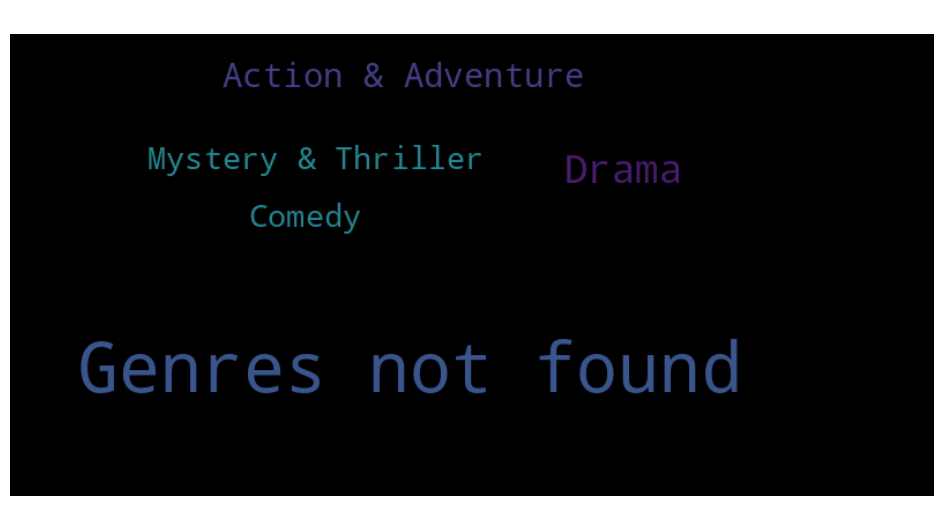

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for movies
wordcloud_movies = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_movies)

# Plot the word cloud for movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()

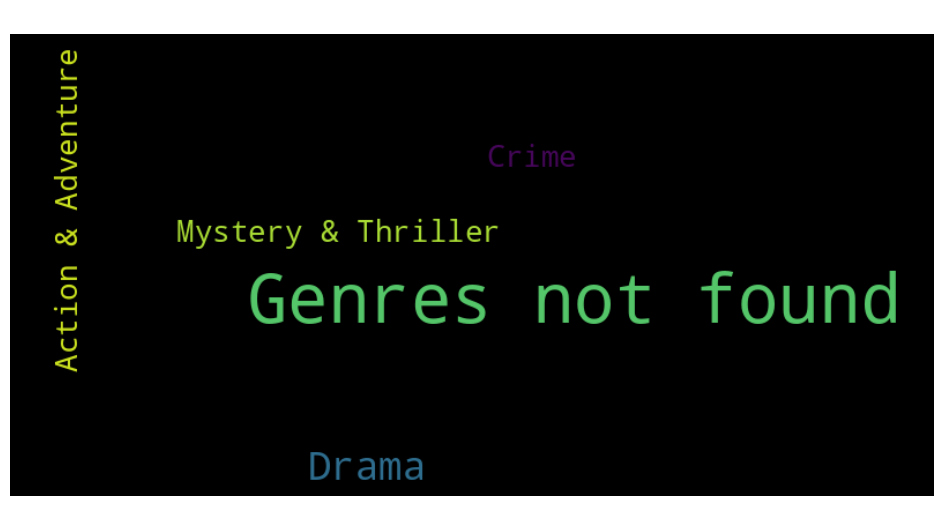

In [ ]:
wordcloud_tv_shows = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_tv_shows)

# Plot the word cloud for TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Top Genres for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()

## **Analyzing Top Genres**

Top Genres for Movies:

Top Genres for TV Shows:


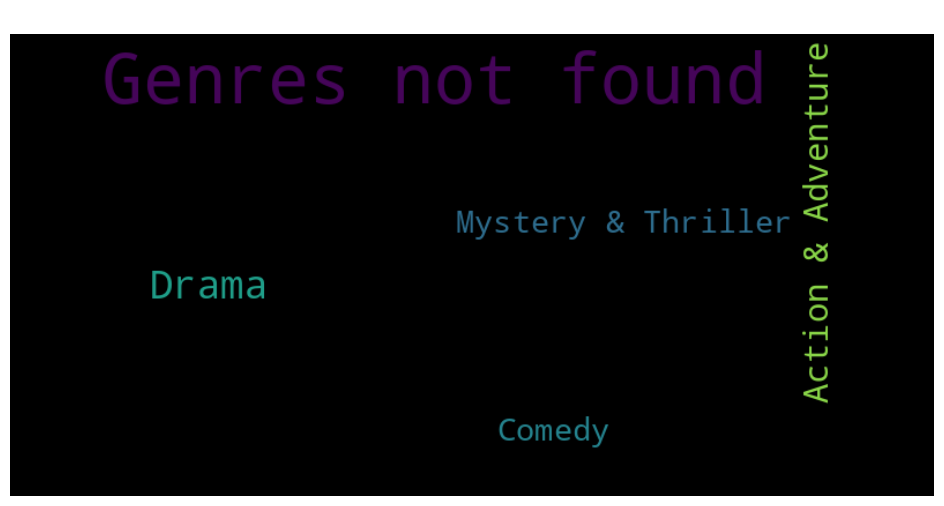

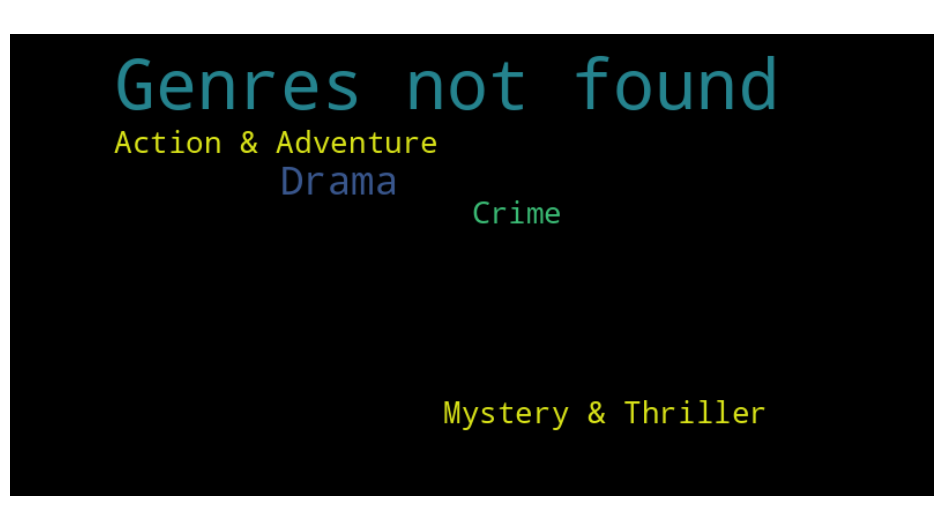

In [ ]:
# Write Your Code here
top_genres_movies = movies_dataframe['movies_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

# Analyze top genres for TV shows
top_genres_tv_shows = tv_shows_dataframe['tv_shows_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_movies_data = {
    'Genre': top_genres_movies.index,
    'Count': top_genres_movies.values
}

top_genres_tv_shows_data = {
    'Genre': top_genres_tv_shows.index,
    'Count': top_genres_tv_shows.values
}

# Create DataFrames
top_genres_movies_df = pd.DataFrame(top_genres_movies_data)
top_genres_tv_shows_df = pd.DataFrame(top_genres_tv_shows_data)

# Display DataFrames
print("Top Genres for Movies:")
top_genres_movies_df

print("\nTop Genres for TV Shows:")
top_genres_tv_shows_df

# Generate a word cloud for movies
wordcloud_movies = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_movies)

# Plot the word cloud for movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()
# Generate a word cloud for TV shows
wordcloud_tv_shows = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_tv_shows)

# Plot the word cloud for TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Top Genres for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract streaming services for movies and TV shows
streaming_services_movies = movies_dataframe['movies_streaming_availability'].str.split(', ', expand=True).stack().value_counts()
streaming_services_tv_shows = tv_shows_dataframe['tv_shows_streaming_availability'].str.split(', ', expand=True).stack().value_counts()

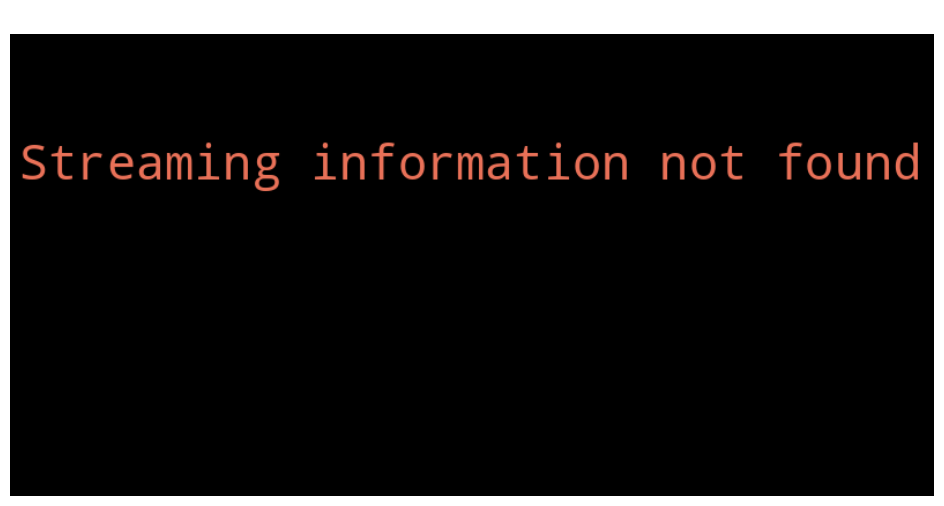

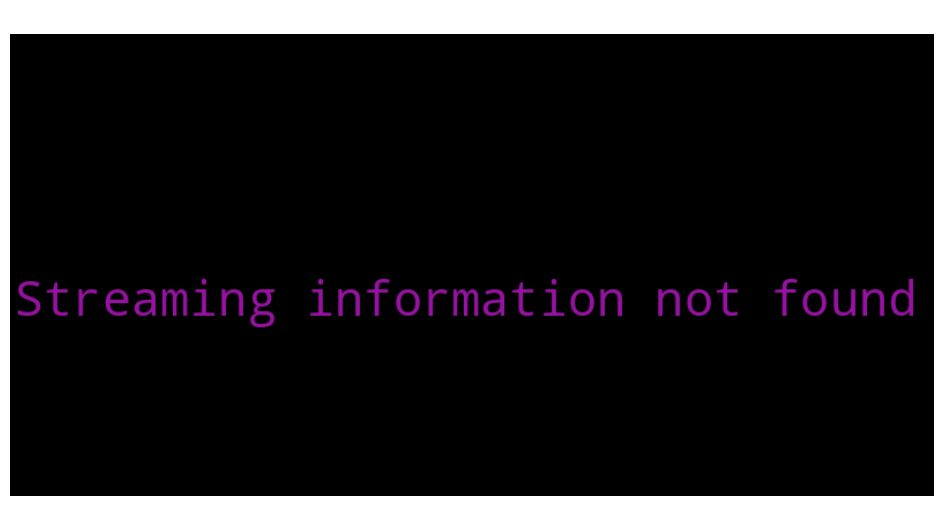

In [ ]:
#Let's Visvalize it using word cloud
wordcloud_movies_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_movies)

# Plot the word cloud for streaming services in movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()

# Generate a word cloud for streaming services in TV shows
wordcloud_tv_shows_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_tv_shows)

# Plot the word cloud for streaming services in TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving filter data as Filter Data in csv format
movies_dataframe.to_csv('movies_data.csv', index=False)

tv_shows_dataframe.to_csv('tv_shows_data.csv', index=False)

sorted_and_filterd_movies.to_csv('filtered_movies_data.csv', index=False)

sorted_and_filterd_tv_shows.to_csv('filtered_tv_shows_data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

https://drive.google.com/drive/folders/1YlnHJ02-pCo96PvBGDK-clf0tP-X8R-L?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***